In [100]:
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.graph_objs as gobj
from IPython.display import Image

In [101]:
#Github URL
url = 'https://raw.githubusercontent.com/Gloriaihuoma/stage-f-07-heart-failure/master/data/heart_failure_clinical_records_dataset.csv'

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
#Importing our dataset
df = pd.read_csv(url)

In [104]:
#checking the first 10 rows
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [105]:
#Checking the dataset description
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


There is a possiblity that we have outliers in creatinine_phosphokinase, platelets,serum_creatinine, ejection_fraction so we should confirm and remove the outliers


**CHECKING FOR OUTLIERS**

**Serum_creatinine** which is creatinine in your bloodstream. From my research, normal creatinine levels range from 0.9 to 1.3 mg/dl in men and 0.6 to 1.1mg/dl in women who are 18 to 60years. 
High serum creatinine levels in the blood indicate that the kidney aren't functioning well or a blocked urinary tract, dehydration etc.
Therefore we dont have any outlier for Seum_creatinine.

**Creatinine_phosphokinase**(CPK) is an enzyme found mainly in the heart, brain, and skeletal muscle. Normal CPK value is around 10 to 120.
High CPK Value can be as a result of stroke, heart attack, lung tissue death etc




**Finding outliers**


**Ejection fraction** (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat.

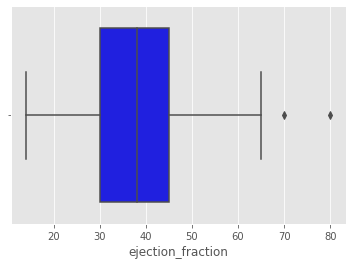

In [106]:
# Boxplot for ejection_fraction
 
sns.boxplot(x = df.ejection_fraction, color = 'Blue')
plt.show()

In [107]:
# Notice that the outliers are greater or equal to 70%, so we remove it.
df = df[df['ejection_fraction']< 70]


Platelets are the cells that circulate within our blood and bind together when recorgnize damamaged blood vessels.
Normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood.
There are no Outliers in Platelets because having more than 450,000 platelets is a condition called **thrombocytosisi.**
And less than 150,000 is known as **thrombcytopenia.**


In [108]:
#check for null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

We do not have any null

In [109]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

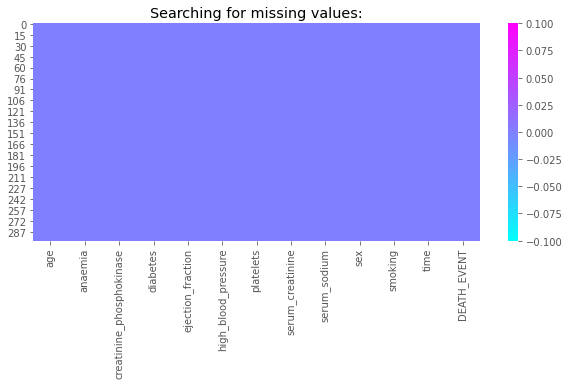

In [110]:
plt.figure(figsize=(10,4))
plt.title('Searching for missing values:')
sns.heatmap(data=df.isnull(),cmap = 'cool', cbar = True)

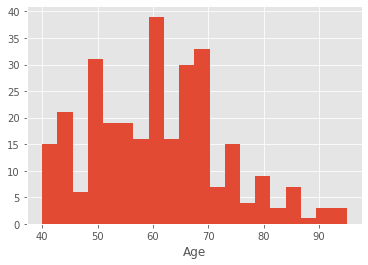

In [111]:
#Visualizing the continous variables
plt.hist(df["age"], bins=20)
plt.xlabel('Age')
plt.show()

In [112]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


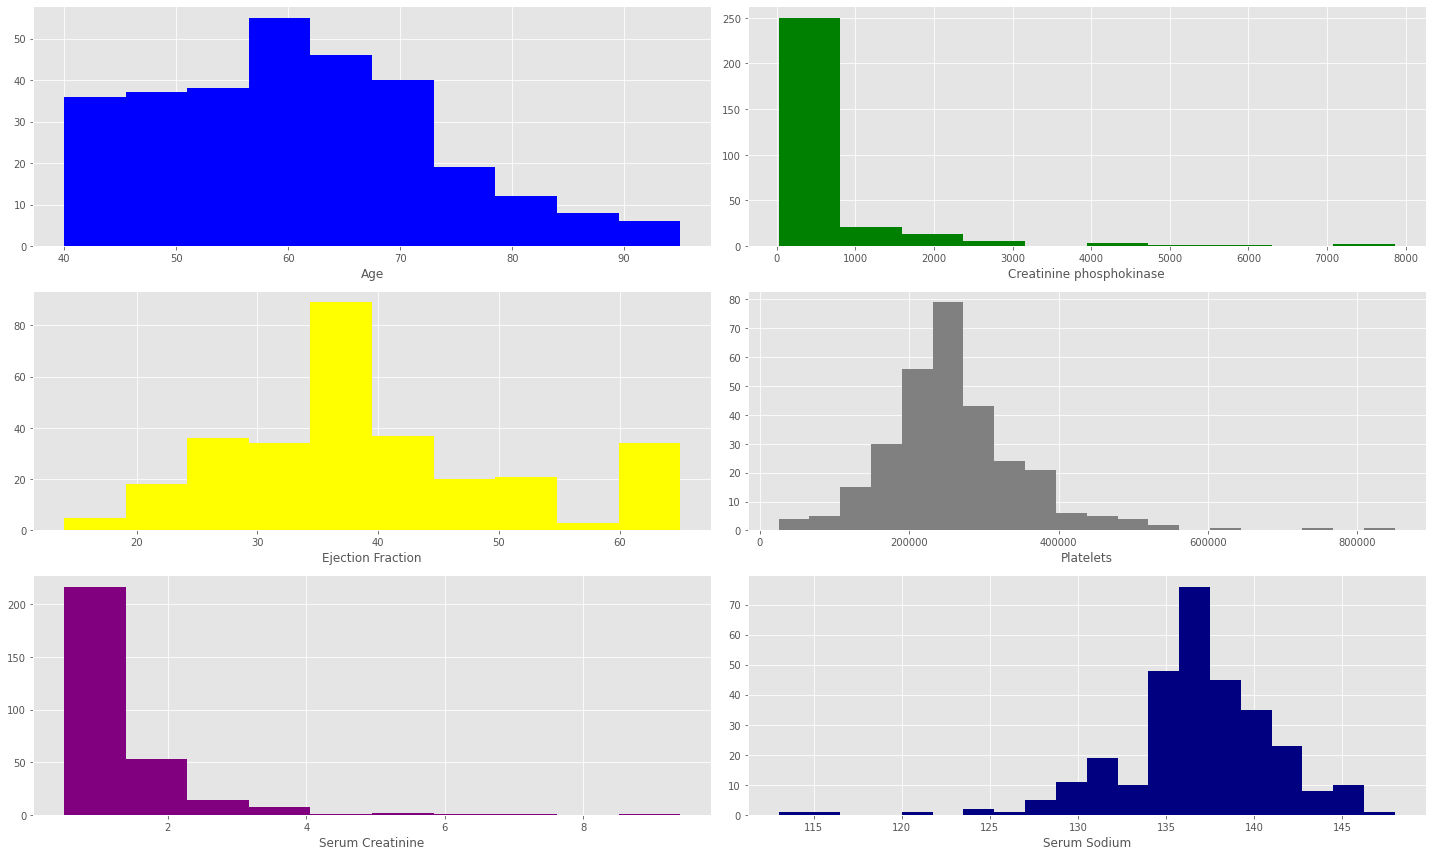

In [113]:
#this is easier to understand for continous variable
plt.style.use('ggplot')
fig, axis  = plt.subplots(nrows = 3, ncols = 2, figsize = (20,12))
 
ax0, ax1, ax2, ax3, ax4, ax5 = axis.flatten()
 
ax0.hist(df['age'], color= 'blue')
ax0.set_xlabel('Age')
 
ax1.hist(df['creatinine_phosphokinase'],color= 'green')
ax1.set_xlabel('Creatinine phosphokinase')
 
ax2.hist(df['ejection_fraction'],color= 'yellow')
ax2.set_xlabel('Ejection Fraction')
 
ax3.hist(df['platelets'],color= 'grey', bins = 20)
ax3.set_xlabel('Platelets')
 
ax4.hist(df['serum_creatinine'],color= 'purple')
ax4.set_xlabel('Serum Creatinine')
 
ax5.hist(df['serum_sodium'],color= 'navy', bins = 20)
ax5.set_xlabel('Serum Sodium')
 
 
 
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

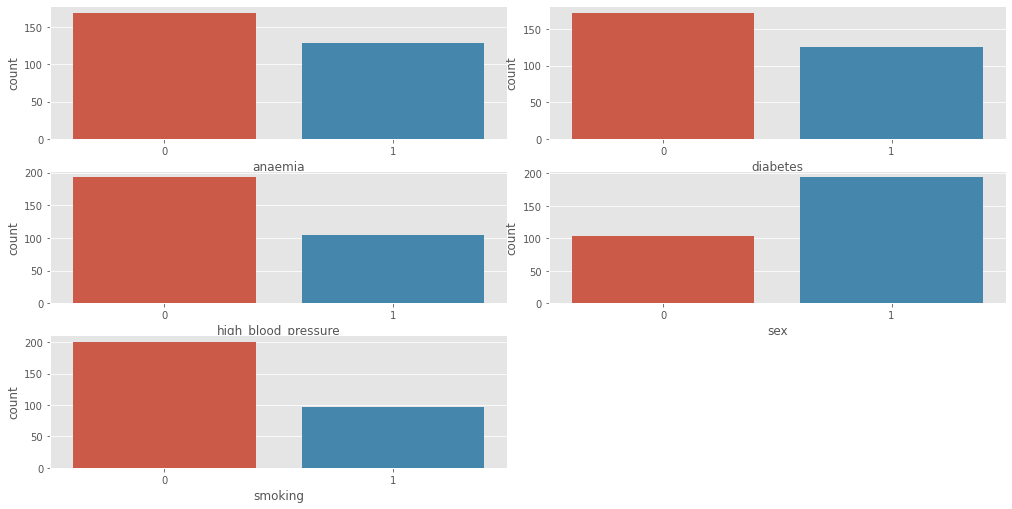

In [114]:
#Checking categorical variables
fig, ax  = plt.subplots(nrows = 3, ncols = 2, figsize = (14,7))
plt.tight_layout()
sns.countplot(df['anaemia'], ax=ax[0,0])
sns.countplot(df['diabetes'], ax=ax[0,1])
sns.countplot(df['high_blood_pressure'], ax=ax[1,0])
sns.countplot(df['sex'], ax=ax[1,1])
sns.countplot(df['smoking'], ax=ax[2,0])
fig.delaxes(ax[2,1])

For zero categories in sex are female while for the rest like anaemia it means  does not have anaemia
Sex - Gender of patient Male = 1, Female =0
Age - Age of patient
Diabetes - 0 = No, 1 = Yes
Anaemia - 0 = No, 1 = Yes
High_blood_pressure - 0 = No, 1 = Yes
Smoking - 0 = No, 1 = Yes
DEATH_EVENT - 0 = No, 1 = Yes

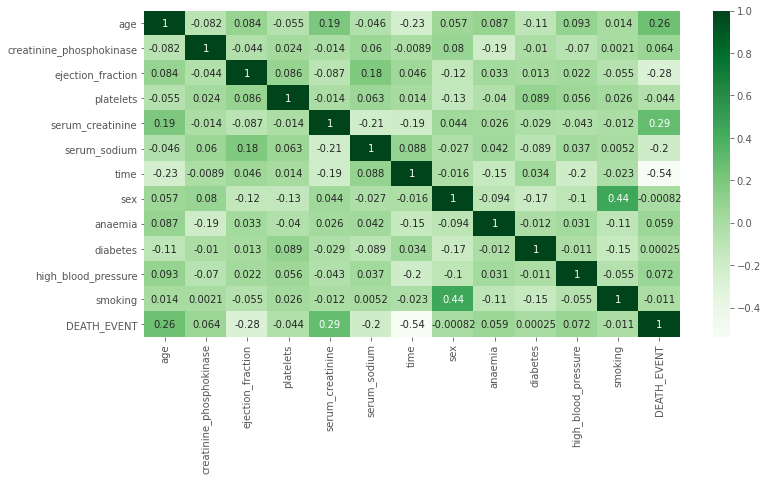

In [115]:
#using heatmap to check the correlation of the variables
plt.figure(figsize = (12,6))
sns.heatmap(df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']].corr(), cmap = 'Greens', annot = True)

From the above heatmap we can see that ejection_fraction, platelets,serum_creatinine,time,sex and smoking has an inverse relationship with death_event


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

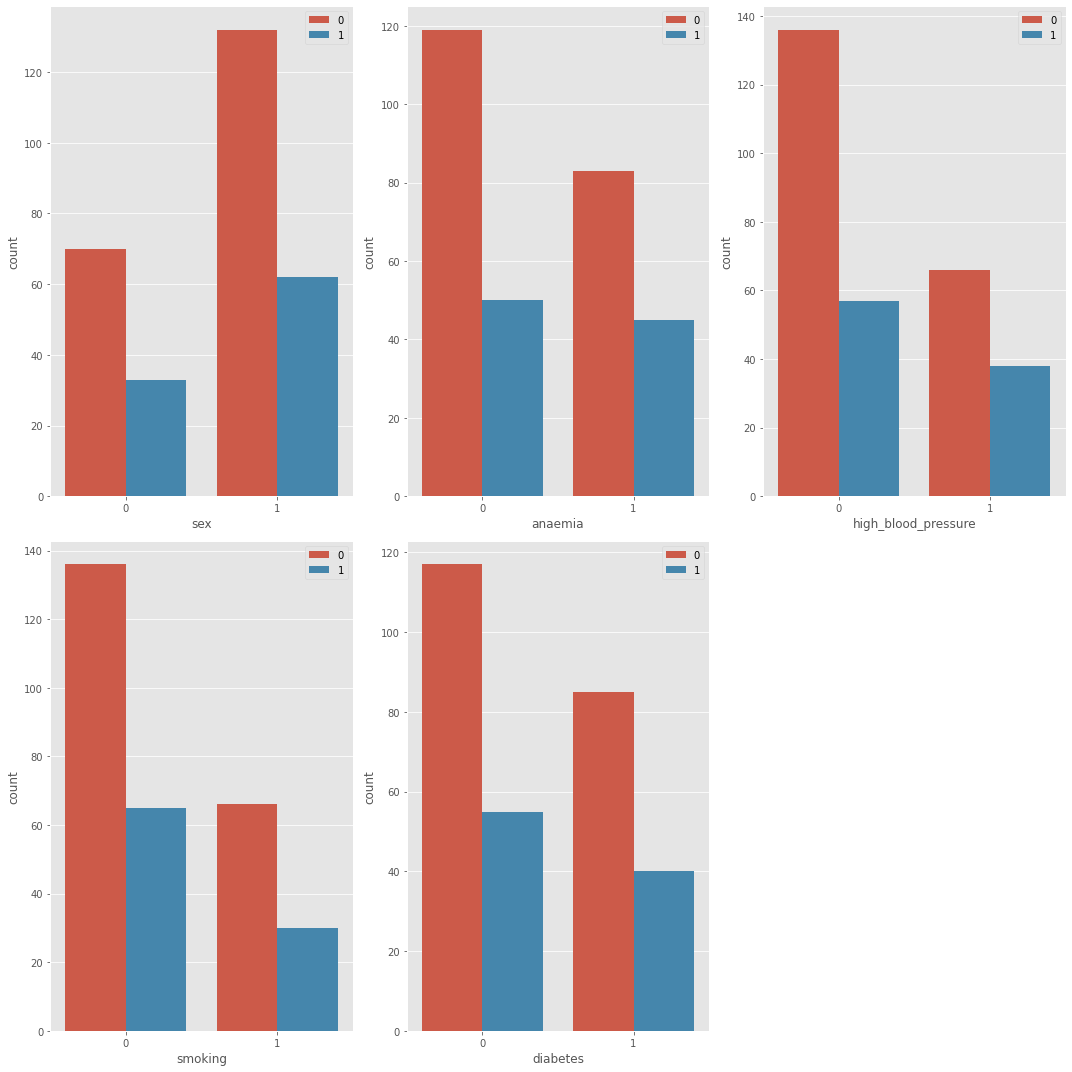

In [116]:
#checking the death event using seaborn
plt.figure(figsize =(15,15))

_ = plt.subplot(2,3,1)
_ = sns.countplot('sex', hue='DEATH_EVENT', data=df)
_ = plt.legend()

_ = plt.subplot(2,3,2)
_ = sns.countplot('anaemia', hue='DEATH_EVENT', data=df)
_ = plt.legend()

_ = plt.subplot(2,3,3)
_ = sns.countplot('high_blood_pressure', hue='DEATH_EVENT', data=df)
_ = plt.legend()

_ = plt.subplot(2,3,4)
_ = sns.countplot('smoking', hue='DEATH_EVENT', data=df)
_ = plt.legend()

_ = plt.subplot(2,3,5)
_ = sns.countplot('diabetes', hue='DEATH_EVENT', data=df)
_ = plt.legend()

_ = plt.tight_layout()

_ = plt.show()

In [117]:
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.7).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


**Let's use plotly to visualize different variables and their relationship with death event**

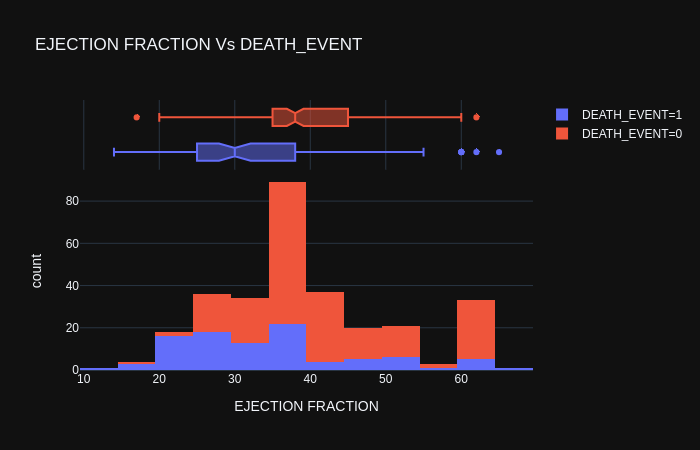

In [118]:
import plotly.express as px
import plotly.io as pio
fig = px.histogram(df, x= "ejection_fraction", color="DEATH_EVENT", marginal="box", hover_data=df.columns,
                   title =" EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark")
fig.show("png")

Ejection fraction is not positively related to death event,we cant tell from the chart above that people with ejection fraction less than 40% had more death event

EJECTION FRACTION    HEART'S PUMPING ABILITY

 Normal               50-75 %

 Below Normal         36-49 %
 
 Low                  35% and below

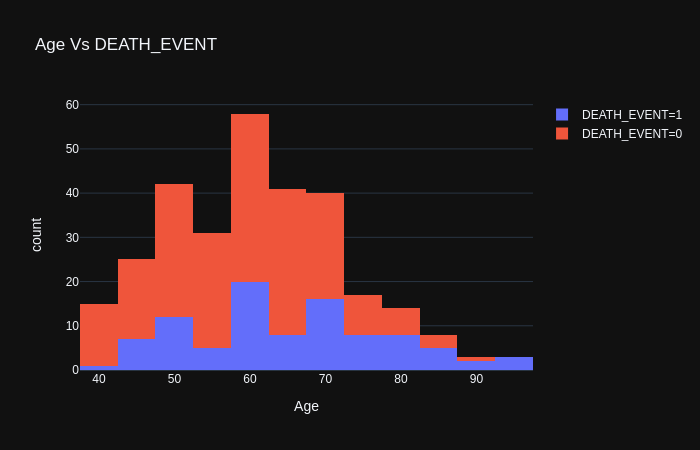

In [119]:
import plotly.express as px
plt = px.histogram(df, x= "age", color="DEATH_EVENT", nbins= 20, hover_data=df.columns,
                   title =" Age Vs DEATH_EVENT", 
                   labels={"age": "Age"},
                   template="plotly_dark")
plt.show("png")

Age has a direct relationship with death event though more people die of heart failure at the age of 60 to 70

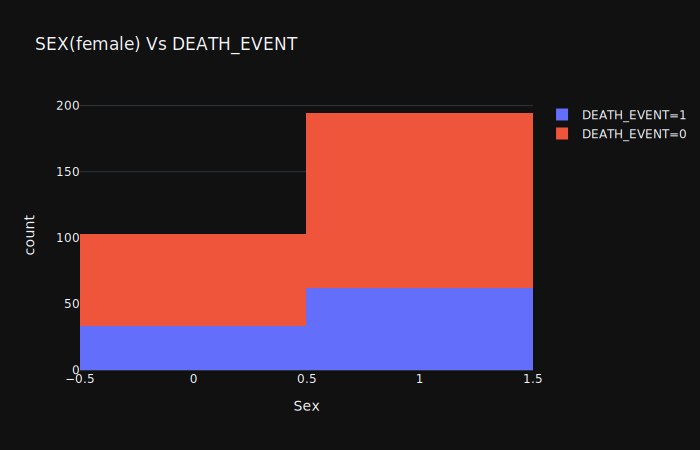

In [120]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
 
plt = px.histogram(df, x= "sex", color="DEATH_EVENT", hover_data=df.columns,
                   title =" SEX(female) Vs DEATH_EVENT", 
                   labels={"sex": "Sex"},
                   template="plotly_dark")
plt.show(renderer="svg")

In [121]:
#number of female in the dataset
female = df['sex']== 0 
female.value_counts()

False    194
True     103
Name: sex, dtype: int64

In [122]:
len(female[df["DEATH_EVENT"]==0])/len(df[df["sex"]==0])

1.9611650485436893

In [123]:
male = df[df['sex']==1]
Rate_of_male_survival = len(male[df["DEATH_EVENT"]==0])/len(df[df["sex"]==1])
Rate_of_male_survival

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.6804123711340206

In [124]:
female = df[df["sex"]==0]
female_survi = female[df["DEATH_EVENT"]==0]
Rate_of_female_survival = len(female[df["DEATH_EVENT"]==0])/len(df[df["sex"]==0])
Rate_of_female_survival

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0.6796116504854369

This means that female and male  has 68% chances of survival and 32% deathrate.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



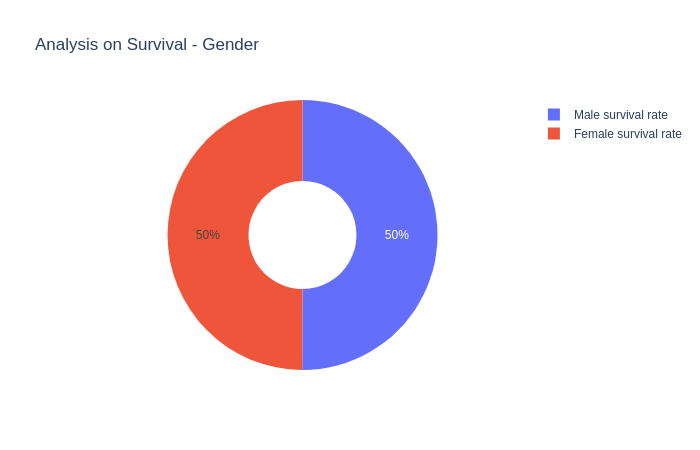

In [125]:
female = df[df["sex"]==0]
female_survi = female[df["DEATH_EVENT"]==0]
Rate_of_female_survival = len(female[df["DEATH_EVENT"]==0])/len(df[df["sex"]==0])
Rate_of_female_survival


labels = ['Female survival rate','Male survival rate']
values = [len(female[df["DEATH_EVENT"]==0])/len(df[df["sex"]==0]), len(male[df["DEATH_EVENT"]==0])/len(df[df["sex"]==1]) ]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show("png")

we have 103 females and 194 males

In [126]:
len(df[df['sex'] == 1])/len(df['sex'])

0.6531986531986532

65% of the dataset are male

In [127]:
len(df[df['sex'] == 0])/len(df['sex'])

0.3468013468013468

35% of the dataset are female

In [128]:
df[['sex', 'DEATH_EVENT']].groupby(['sex'], as_index = False).mean()

,sex,DEATH_EVENT
0,0,0.320388
1,1,0.319588


In [129]:
deathevent_sex = df.groupby(['sex','DEATH_EVENT']).count()
deathevent_sex.head()

age  anaemia  ...  smoking  time
sex DEATH_EVENT                ...               
0   0             70       70  ...       70    70
    1             33       33  ...       33    33
1   0            132      132  ...      132   132
    1             62       62  ...       62    62

[4 rows x 11 columns]

I observed though the population of male is greater than female in this dataset, but their deathevents are 32%.


Therefore the chances of any gender surviving is almost the same.

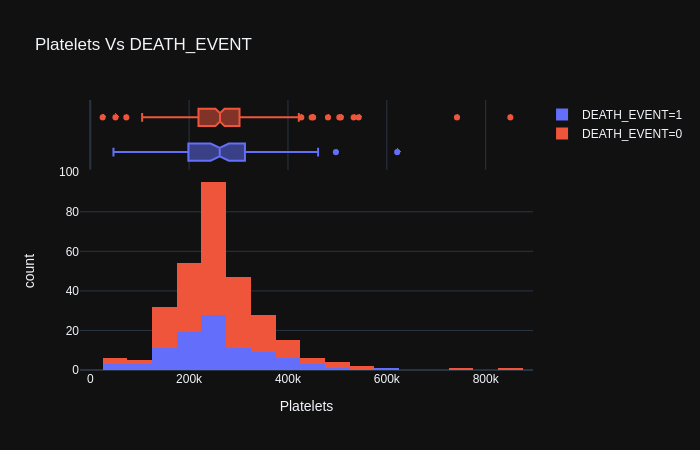

In [130]:
import plotly.express as px
fig = px.histogram(df, x= "platelets", color="DEATH_EVENT", marginal="box", hover_data=df.columns,
                   title =" Platelets Vs DEATH_EVENT", 
                   labels={'platelets': "Platelets"},
                   template="plotly_dark")
fig.show("png")

Normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood.

Platelet does not look like it has a direct relationship with death event.

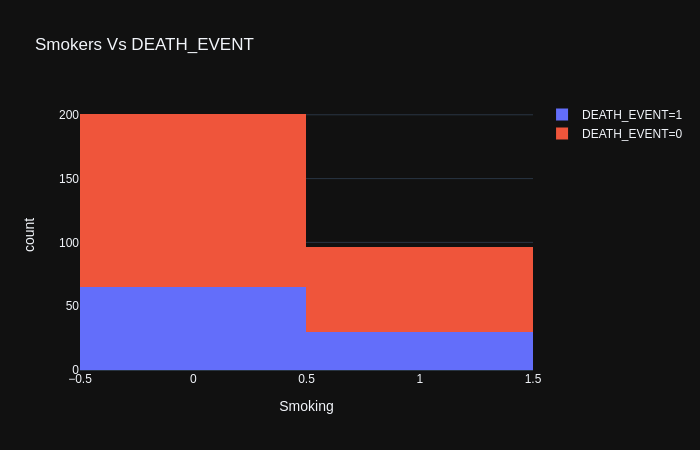

In [131]:
import plotly.express as px
fig = px.histogram(df, x= "smoking", color="DEATH_EVENT", hover_data=df.columns,
                   title =" Smokers Vs DEATH_EVENT", 
                   labels={"smoking": "Smoking"},
                   template="plotly_dark")
fig.show("png")

Smoking does not have a direct relationship with deathevent more people that does not smoke died

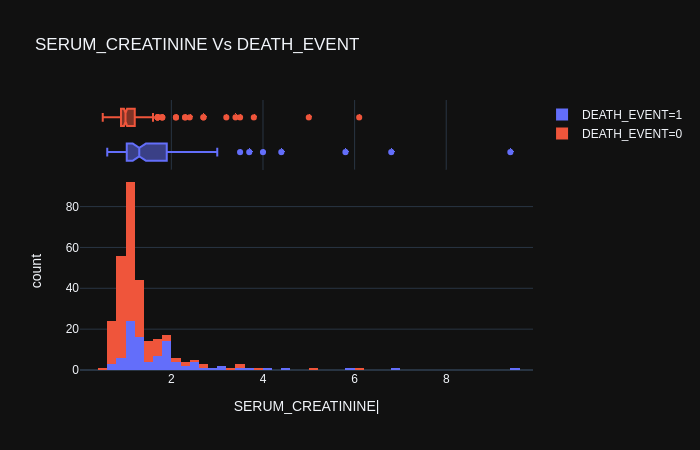

In [132]:
import plotly.express as px
fig = px.histogram(df, x= "serum_creatinine", color="DEATH_EVENT", marginal="box", hover_data=df.columns,
                   title =" SERUM_CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM_CREATININE|"},
                   template="plotly_dark")
fig.show("png")

Serum_creatinine which is creatinine in your bloodstream.
From my research, normal creatinine levels range from 0.9 to 1.3 mg/dl in men and 0.6 to 1.1mg/dl in women who are 18 to 60years. High serum creatinine levels in the blood indicate that the kidney aren't functioning well or a blocked urinary tract, dehydration etc. 

Serum_creatinine has a 0.29 positive relationship with death event, from the chart above we can see very high serum_creatinine died more.

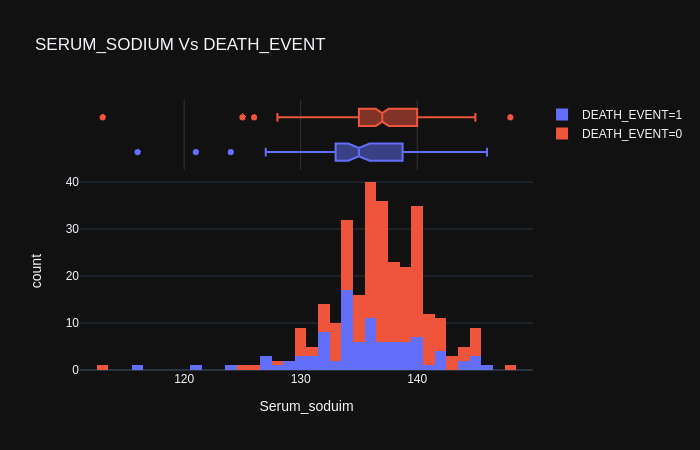

In [133]:
import plotly.express as px
fig = px.histogram(df, x= "serum_sodium", color="DEATH_EVENT", marginal="box", hover_data=df.columns,
                   title =" SERUM_SODIUM Vs DEATH_EVENT", 
                   labels={"serum_sodium": "Serum_soduim"},
                   template="plotly_dark")
fig.show("png")


The normal range for blood sodium levels is 135 to 145 milliequivalents per liter.

From the chart above serum_sodium has no direct relationship with deathevent


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



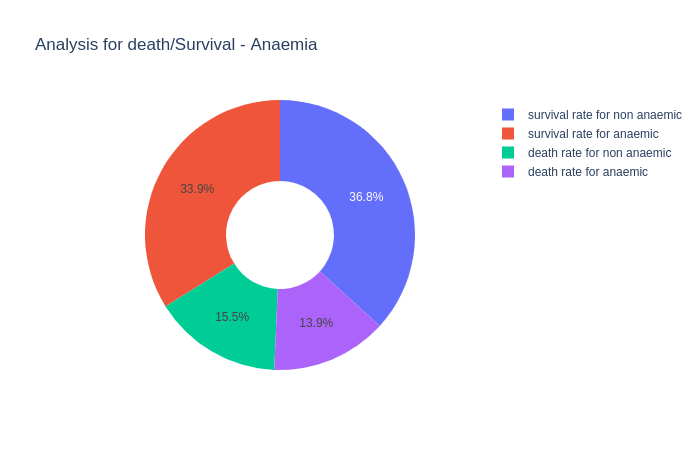

In [134]:
#Rate survival and death for people that are anaemic
non_anaemic = df[df["anaemia"]==0]
anaemic = df[df["anaemia"]==1]

labels = ['survival rate for non anaemic','survival rate for anaemic','death rate for non anaemic','death rate for anaemic']
values = [len(non_anaemic[df["DEATH_EVENT"]==0])/len(df[df["anaemia"]==0]), len(anaemic[df["DEATH_EVENT"]==0])/len(df[df["anaemia"]==1]), len(non_anaemic[df["DEATH_EVENT"]==1])/len(df[df["anaemia"]==0]), len(anaemic[df["DEATH_EVENT"]==1])/len(df[df["anaemia"]==0])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis for death/Survival - Anaemia")
fig.show("png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



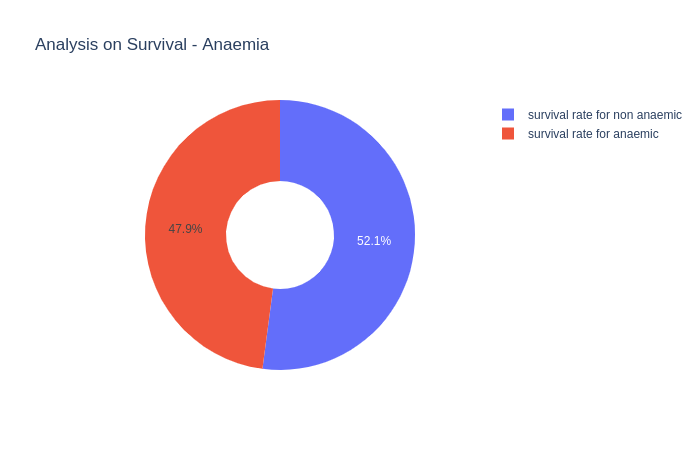

In [135]:
#rate of Anaemic survival
non_anaemic = df[df["anaemia"]==0]
anaemic = df[df["anaemia"]==1]

labels = ['survival rate for non anaemic','survival rate for anaemic']
values = [len(non_anaemic[df["DEATH_EVENT"]==0])/len(df[df["anaemia"]==0]), len(anaemic[df["DEATH_EVENT"]==0])/len(df[df["anaemia"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia")
fig.show("png")

The chart above shows that the chance of someon that has anaemia surviving is 47.9%, which is close to the chance of someone thats does not have annemia.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



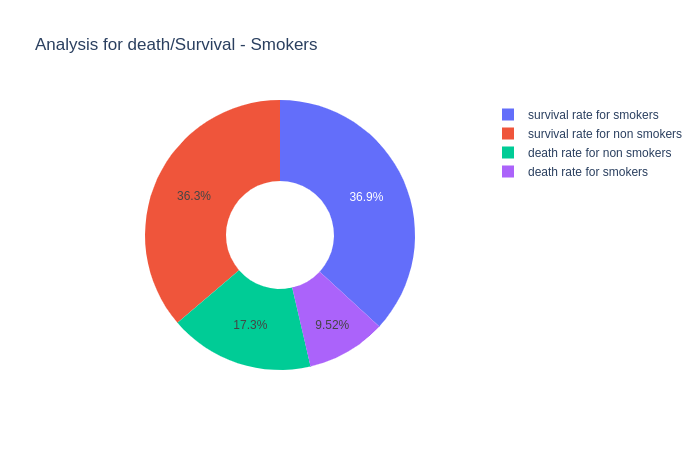

In [136]:
#Rate survival and death for people that are smokes
non_smokers = df[df["smoking"]==0]
smokers = df[df["smoking"]==1]

labels = ['survival rate for non smokers','survival rate for smokers','death rate for non smokers','death rate for smokers']
values = [len(non_smokers[df["DEATH_EVENT"]==0])/len(df[df["smoking"]==0]), len(smokers[df["DEATH_EVENT"]==0])/len(df[df["smoking"]==1]), len(non_smokers[df["DEATH_EVENT"]==1])/len(df[df["smoking"]==0]), len(smokers[df["DEATH_EVENT"]==1])/len(df[df["anaemia"]==0])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis for death/Survival - Smokers")
fig.show("png")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



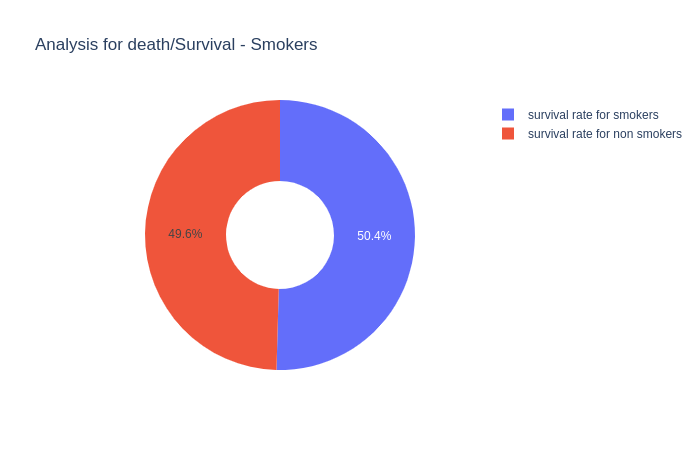

In [137]:
#Rate survival and death for people that are smokes
non_smokers = df[df["smoking"]==0]
smokers = df[df["smoking"]==1]

labels = ['survival rate for non smokers','survival rate for smokers','death rate for non smokers','death rate for smokers']
values = [len(non_smokers[df["DEATH_EVENT"]==0])/len(df[df["smoking"]==0]), len(smokers[df["DEATH_EVENT"]==0])/len(df[df["smoking"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis for death/Survival - Smokers")
fig.show("png")

The chart above shows that the chance of someone that smokes surviving is 50.4%, which is close to the chance of someone thats does not smoke.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

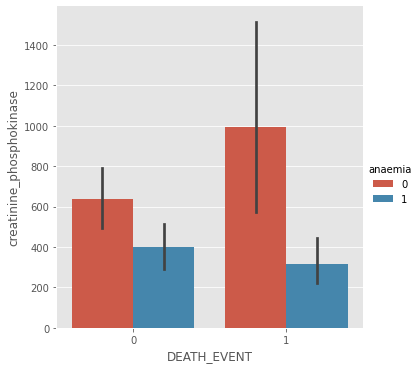

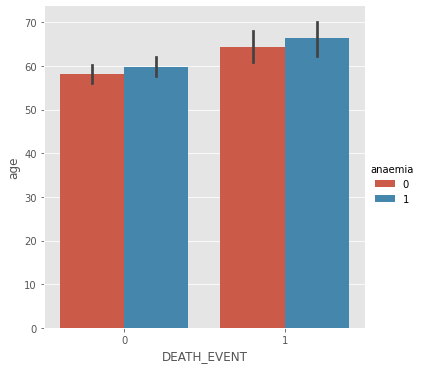

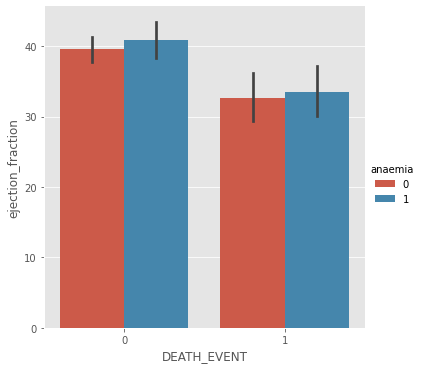

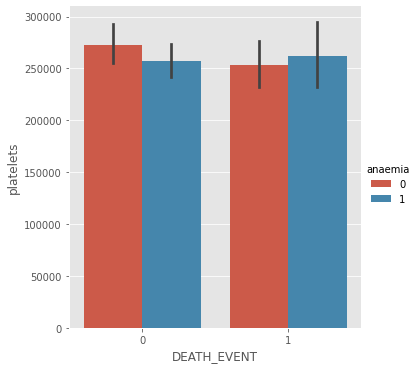

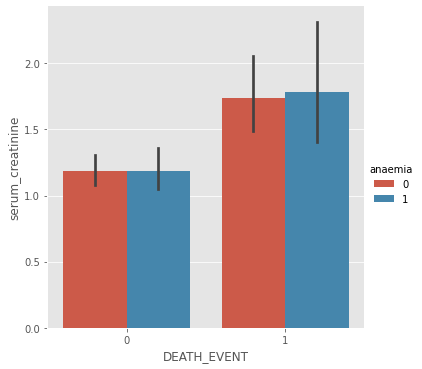

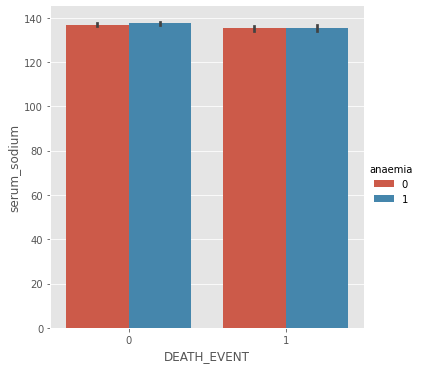

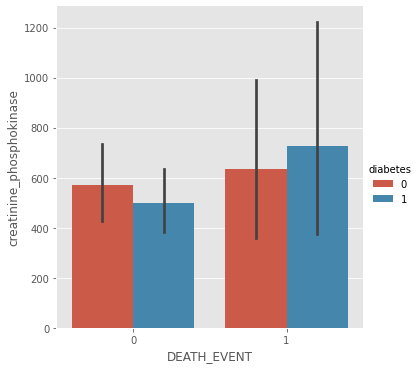

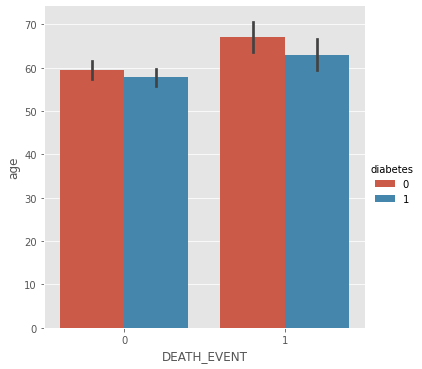

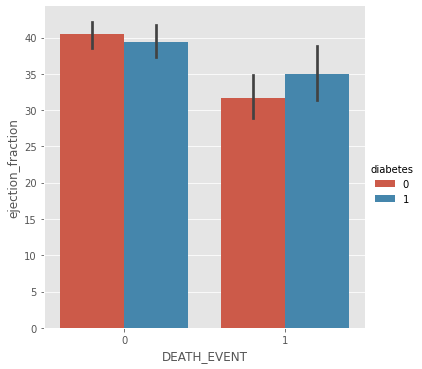

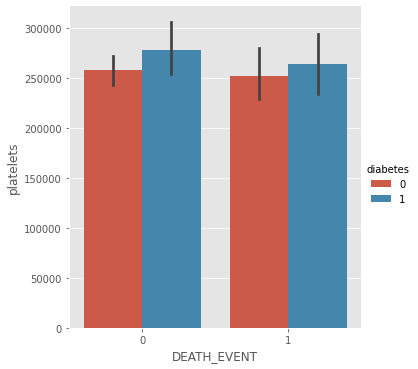

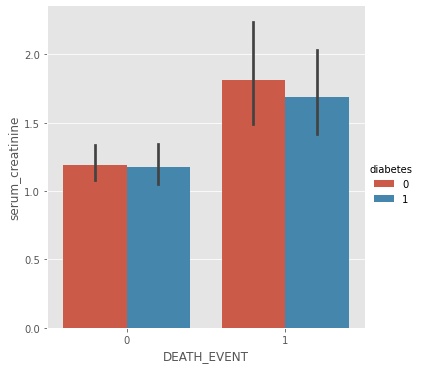

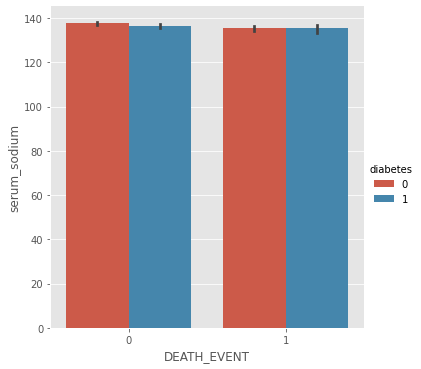

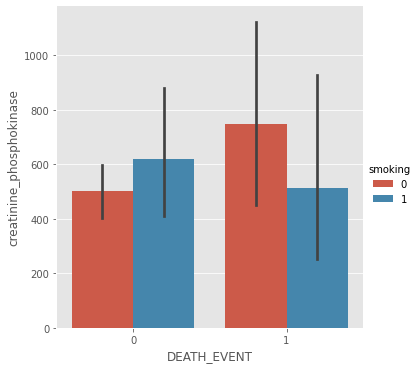

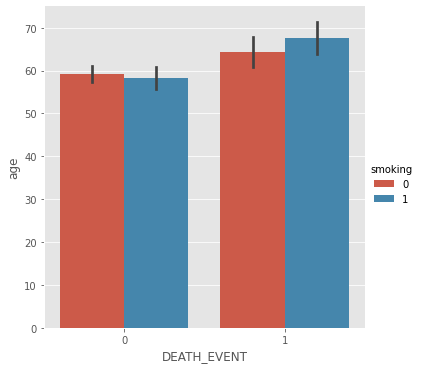

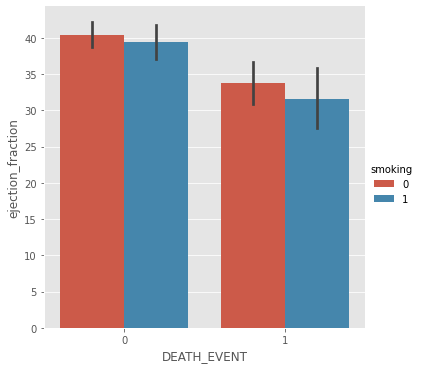

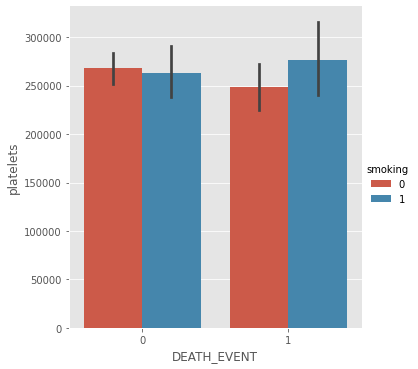

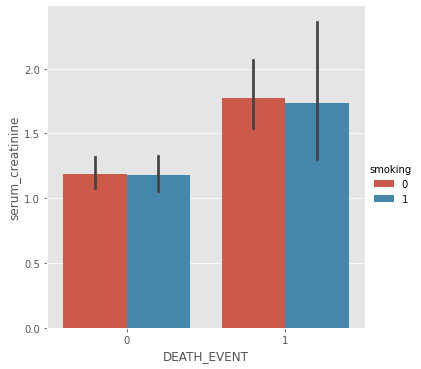

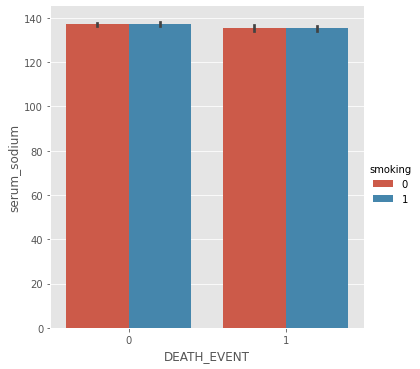

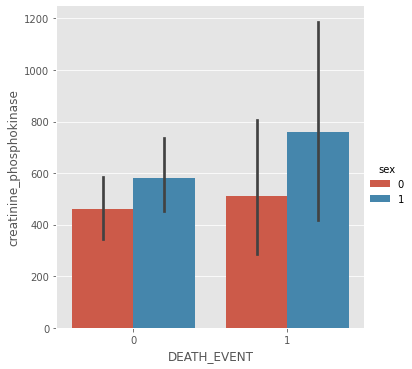

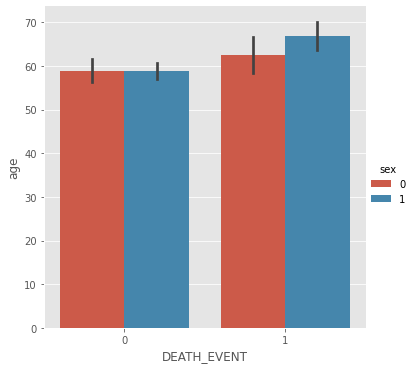

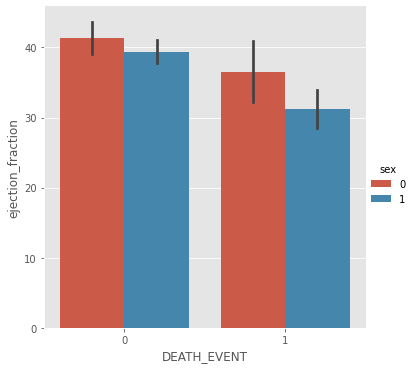

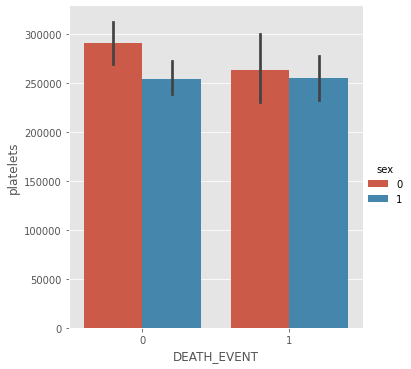

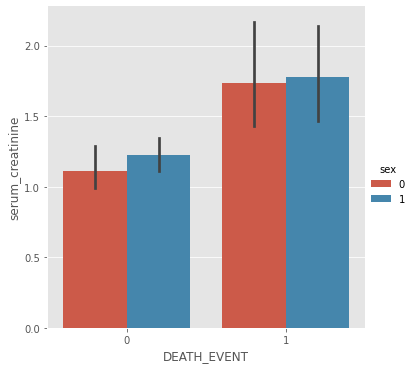

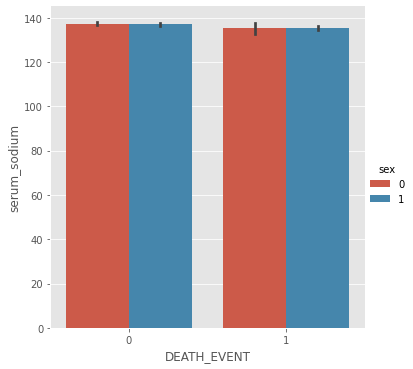

In [138]:
#analysing chances of death event considering two underlying event
cat=['anaemia','diabetes','smoking','sex']
con=['creatinine_phosphokinase','age','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for x in cat:
  for y in con:
      sns.catplot(x='DEATH_EVENT',y=y,hue=x,kind='bar',data=df)

The Age,anaemia and death event chart, shows that older anaemic patient die more than tne non_anaemic people.

The ejection_fraction,anaemia and death event chart, show people with low ejection_fraction and other underlying diseases die more.
we can recall the normal ejection_fraction is from 50-75% anaemic patient die more than tne non_anaemic people.


Going through all the **catplot** I noticed that patient having two underlying diseases does not signify that the patient will die of heart failure.


In [139]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [140]:
deaths=df[df['DEATH_EVENT']==True]
deaths.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [141]:
#no of deathevent
deaths.shape

(95, 13)

In [142]:
#no of death events that had anaemia,diabetes,high blood pressure,smokes.

a=deaths['anaemia'].sum()
b=deaths['diabetes'].sum()
c=deaths['high_blood_pressure'].sum()
d=deaths['smoking'].sum() 

to_print="Anaemic: {}, had diabetes: {}, had high blood pressure:{}, smokes:{}".format(a,b,c,d)
print(to_print)

Anaemic: 45, had diabetes: 40, had high blood pressure:38, smokes:30


In [143]:
##Total no of people that had anaemia,diabetes,high blood pressure,smokes.
a=df['anaemia'].sum()
b=df['diabetes'].sum()
c=df['high_blood_pressure'].sum()
d=df['smoking'].sum() 

to_print="Anaemic: {}, had diabetes: {}, had high blood pressure:{}, smokes:{}".format(a,b,c,d)
print(to_print)

Anaemic: 128, had diabetes: 125, had high blood pressure:104, smokes:96


I observed that patient with three or more underlying diseases has a higher probablity of dying.